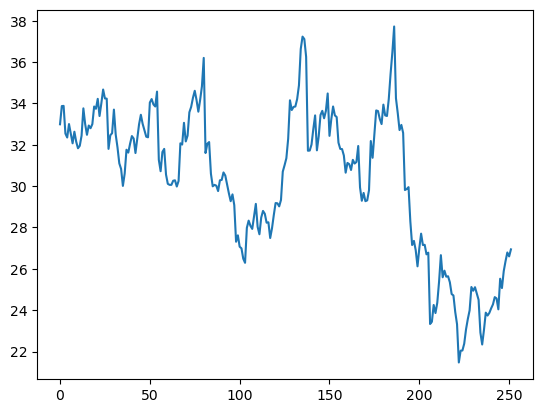

In [2]:
#Fernando Crescencio time prediction
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AutoReg

import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler


df = pd.read_csv('PETR4.SA.csv')
x = df.index
y = df['Close']
plt.plot(x,y);

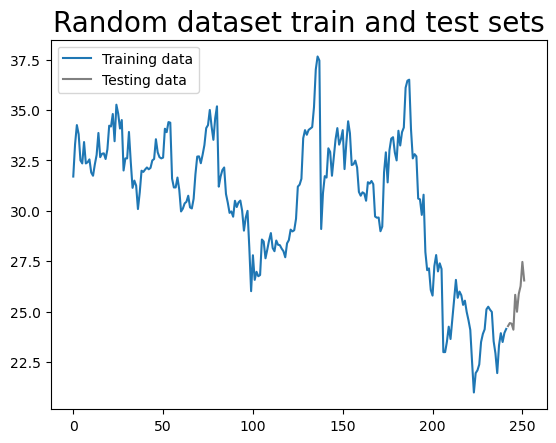

In [3]:
# Train/test split
df_train = df[:-10]
df_test = df[-10:]

# Plot
plt.title('Random dataset train and test sets', size=20)
plt.plot(df_train['y'], label='Training data')
plt.plot(df_test['y'], color='gray', label='Testing data')
plt.legend();

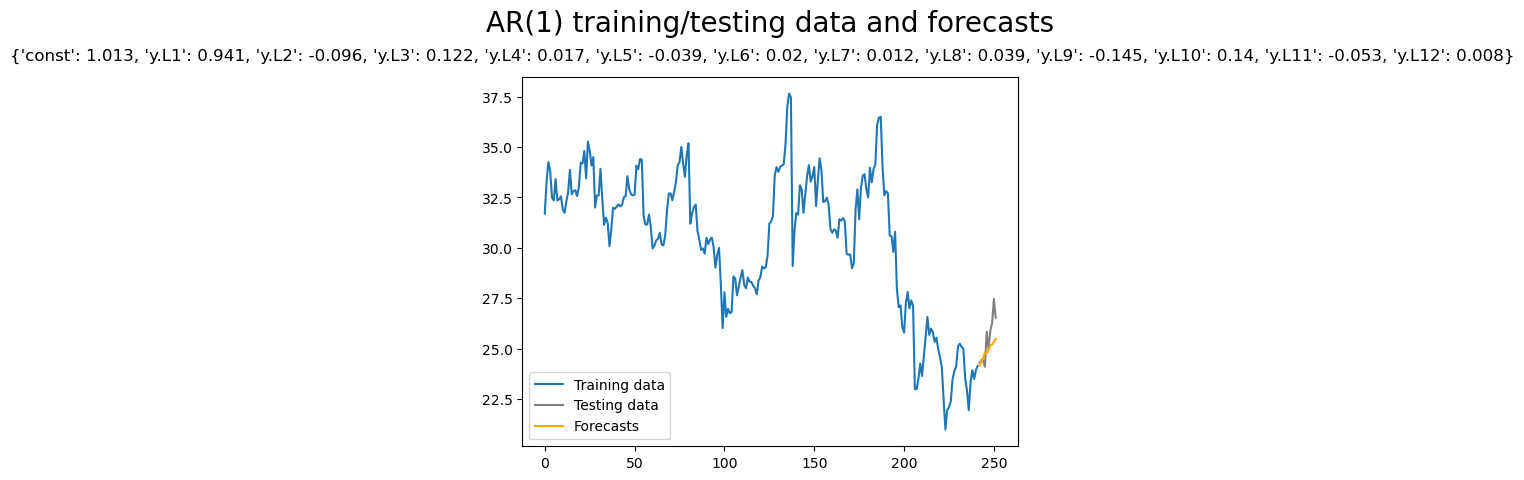

In [6]:

def train_and_plot(maxlag):#modelo autoregression
    model = AutoReg(df_train['y'],12,'c').fit()#esse terceiro paramtero(lags) é o principal
    forecasts = model.predict(
        start=len(df_train),
        end=len(df_train) + len(df_test) - 1,
        dynamic=False
    )
    
    parameters = model.params.to_dict()
    for k, v in parameters.items():
        parameters[k] = np.round(v, 3)
    
    plt.title(f'AR({maxlag}) training/testing data and forecasts', size=20, y=1.1)
    plt.suptitle(parameters, y=0.94)
    plt.plot(df_train['y'], label='Training data')
    plt.plot(df_test['y'], color='gray', label='Testing data')
    plt.plot(forecasts, color='orange', label='Forecasts')
    plt.legend();
    return forecasts

forecast=train_and_plot(1)


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from math import sqrt




#tive um erro para fazer os testes de precisão do modelo, tentei usar uma variável "forecast" na função que treina modelo, mas dava um erro, porém acredito que as funções e os parâmetros estejam certos.


print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(df_test, forecast))
print('Mean Squared Error (MSE) :', metrics.mean_squared_error(df_test, forecast))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(df_test, forecast)))

x2 = df_test.Actual_Price.mean()
y2 = forecast.mean()
Accuracy1 = x2/y2*100
print("The accuracy of the model is " , Accuracy1)


NameError: name 'forecast' is not defined